# Data source
https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

# Creating dataset

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

In [189]:
DIR = '/home/kosiyyu/Downloads/kagglecatsanddogs_5340/PetImages'
CATS = DIR + '/Cat'
DOGS = DIR + '/Dog'
CATEGORIES = { CATS: 0, DOGS: 1}
IMG_SIZE = 100

In [191]:
print(DIR)
print(CATS)
print(DOGS)
print(CATEGORIES)
print(IMG_SIZE)

/home/kosiyyu/Downloads/kagglecatsanddogs_5340/PetImages
/home/kosiyyu/Downloads/kagglecatsanddogs_5340/PetImages/Cat
/home/kosiyyu/Downloads/kagglecatsanddogs_5340/PetImages/Dog
{'/home/kosiyyu/Downloads/kagglecatsanddogs_5340/PetImages/Cat': 0, '/home/kosiyyu/Downloads/kagglecatsanddogs_5340/PetImages/Dog': 1}
100


In [193]:
print(os.listdir(CATS)[:5])
print(os.listdir(DOGS)[:5])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']


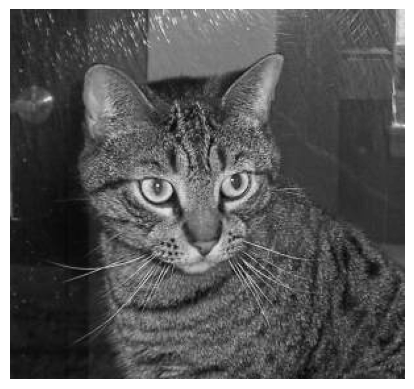

(281, 300)


In [195]:
img_array = cv2.imread(os.path.join(CATS, '1.jpg'))
img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.axis('off') 
plt.show()

print(img.shape)

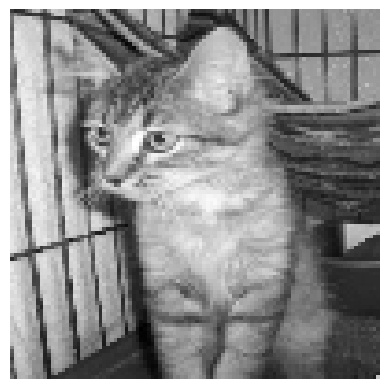

(100, 100)


In [81]:
img_array = cv2.imread(os.path.join(CATS, '2.jpg'))
flag_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
img = cv2.cvtColor(flag_array, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
plt.axis('off') 
plt.show()

print(img.shape)

In [82]:
def create_traning_data():
    samples = []
    for path in CATEGORIES.keys():
        for name in os.listdir(path):
            try:
                updated_path = os.path.join(path, name)
                img_array = cv2.imread(updated_path)
                flag_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                processed_array = cv2.cvtColor(flag_array, cv2.COLOR_BGR2GRAY)
                samples.append([processed_array, CATEGORIES[path]])
            except Exception as e:
                pass
            
    return samples

In [83]:
traning_data = create_traning_data()
len(traning_data)

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


24946

In [84]:
X = []
y = []

random.shuffle(traning_data)

for feature, label in traning_data:
    X.append(feature)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

## Save data

In [86]:
import pickle

with open('cats_dogs_x_y_data.pkl', 'wb') as f:
    pickle.dump((X, y), f)

In [87]:
X = []
y = []

with open('cats_dogs_x_y_data.pkl', 'rb') as f:
    X, y = pickle.load(f)

In [88]:
len(y)

24946

In [89]:
!pip install tensorflow

# Convolutional Neural Network

In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

In [92]:
X = X/255.0 # not values will between [0, 1]

In [93]:
print(type(X), type(y))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [154]:
model = Sequential([
    Input(shape=X.shape[1:]),
    Conv2D(64, (3,3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3,3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 76s 107ms/step - accuracy: 0.6101 - loss: 0.6458 - val_accuracy: 0.7431 - val_loss: 0.5182
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 72s 103ms/step - accuracy: 0.7612 - loss: 0.4976 - val_accuracy: 0.7808 - val_loss: 0.4678
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.8066 - loss: 0.4189 - val_accuracy: 0.7916 - val_loss: 0.4408
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 71s 102ms/step - accuracy: 0.8415 - loss: 0.3546 - val_accuracy: 0.7715 - val_loss: 0.4997
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.8766 - loss: 0.2843 - val_accuracy: 0.7848 - val_loss: 0.4830
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.9220 - loss: 0.1953 - val_accuracy: 0.7876 - val_loss: 0.5580
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 71s 102ms/step - accuracy: 0.9507 - loss: 0.1321 - val_accuracy: 0.7932 - val_loss: 0.6389
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - accuracy: 0.9775 - loss: 0

In [158]:
model.save('cats_dogs_model.keras')

In [162]:
!ls

cats_dogs.ipynb        cats_dogs_x_y_data.pkl	    mnist.ipynb
cats_dogs_model.keras  magic_gamma_telescope.ipynb


# Showcase

In [171]:
model = load_model('cats_dogs_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
|  id: 0, real val: 0, predicted val: 0.005791597533971071
V


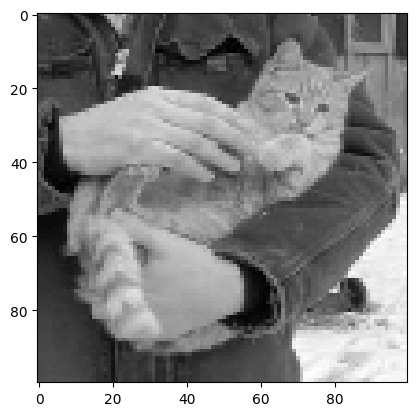

|  id: 1, real val: 0, predicted val: 0.0008672361145727336
V


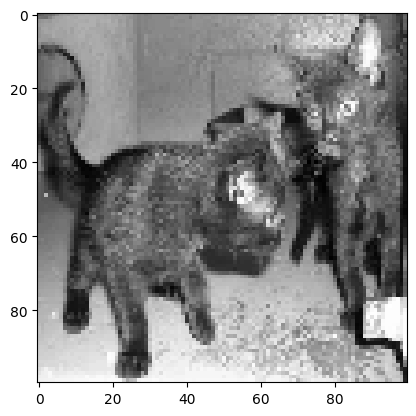

|  id: 2, real val: 0, predicted val: 0.009438973851501942
V


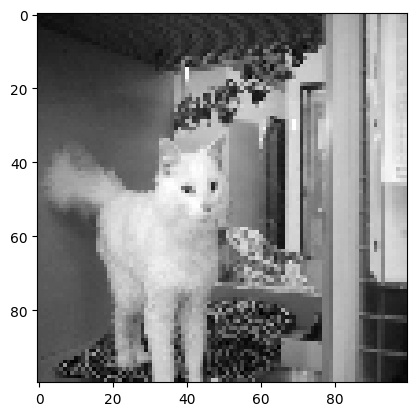

|  id: 3, real val: 0, predicted val: 1.0663760541262945e-08
V


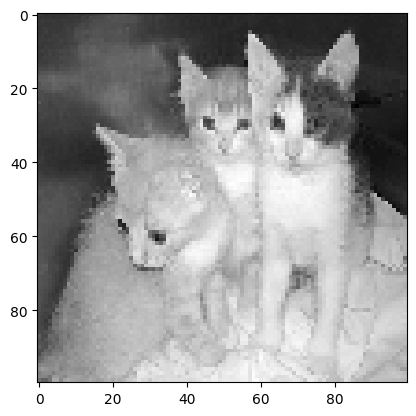

|  id: 4, real val: 0, predicted val: 8.207429180728809e-11
V


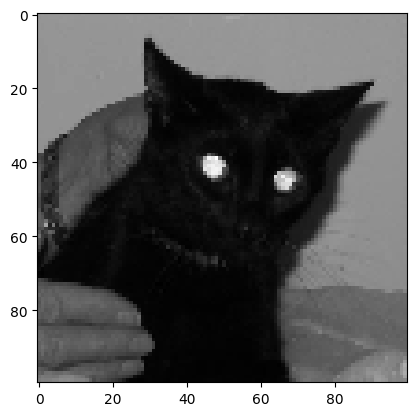

|  id: 5, real val: 0, predicted val: 0.00014685776841361076
V


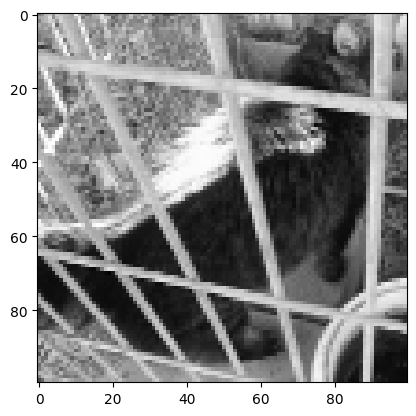

|  id: 6, real val: 0, predicted val: 0.003156764432787895
V


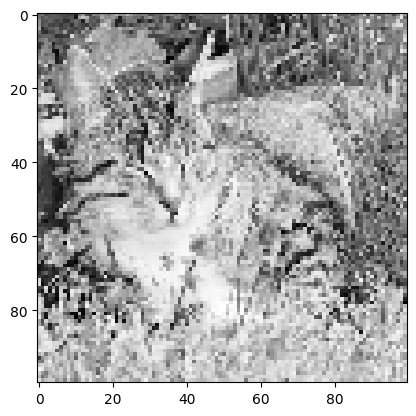

|  id: 7, real val: 0, predicted val: 0.0005775439785793424
V


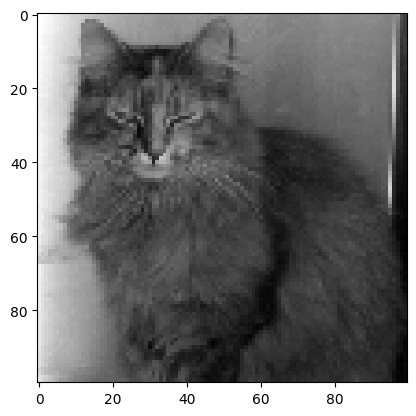

|  id: 8, real val: 1, predicted val: 0.9999998807907104
V


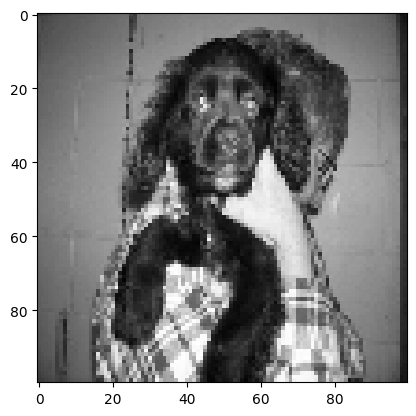

|  id: 9, real val: 0, predicted val: 0.009569318033754826
V


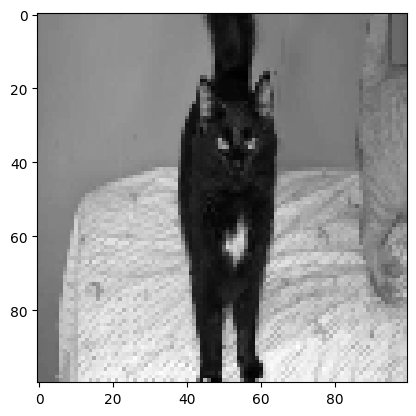

|  id: 10, real val: 0, predicted val: 0.007106225471943617
V


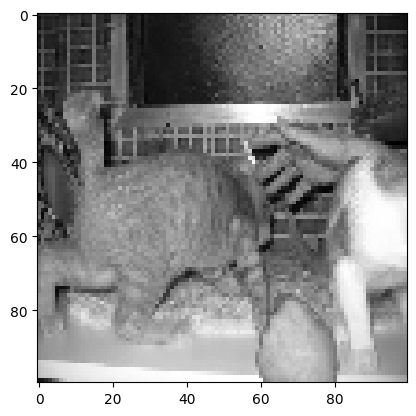

|  id: 11, real val: 0, predicted val: 0.017662540078163147
V


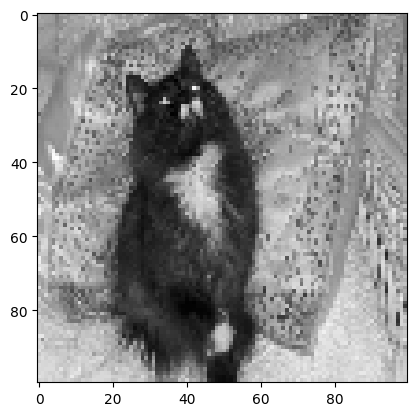

|  id: 12, real val: 0, predicted val: 0.00229671155102551
V


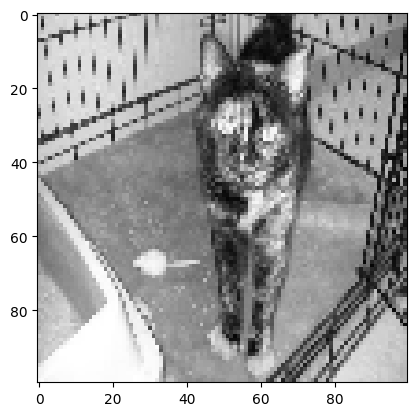

|  id: 13, real val: 1, predicted val: 0.9999999403953552
V


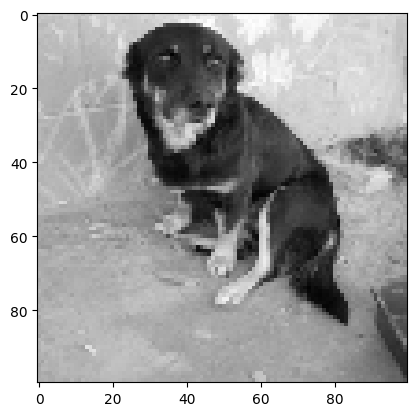

|  id: 14, real val: 1, predicted val: 0.9998906254768372
V


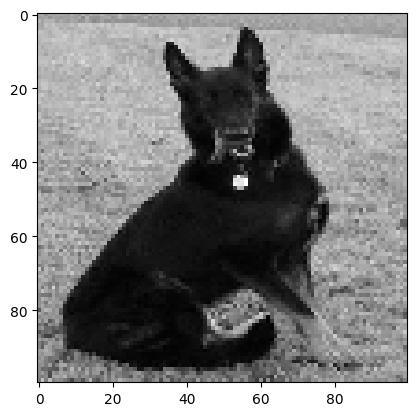

|  id: 15, real val: 1, predicted val: 0.9999969005584717
V


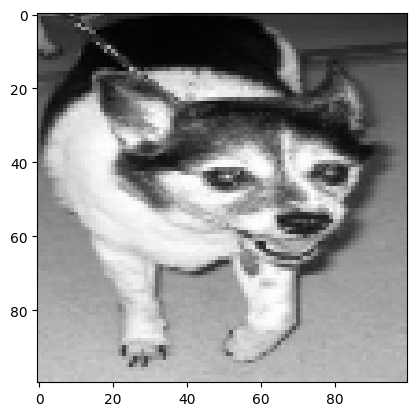

|  id: 16, real val: 1, predicted val: 1.0
V


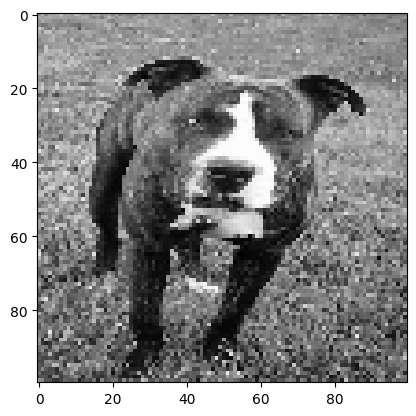

|  id: 17, real val: 0, predicted val: 0.012886503711342812
V


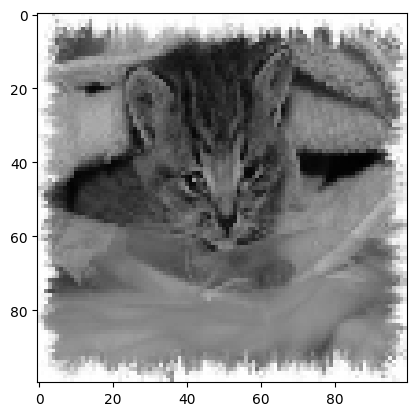

|  id: 18, real val: 0, predicted val: 0.025248197838664055
V


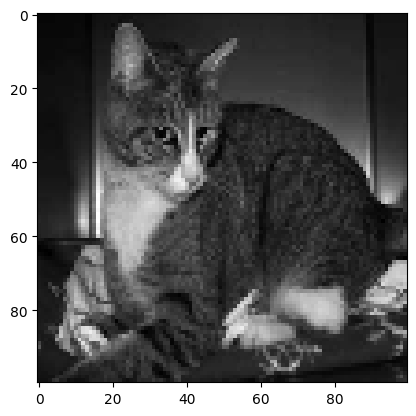

|  id: 19, real val: 0, predicted val: 2.706976556510199e-05
V


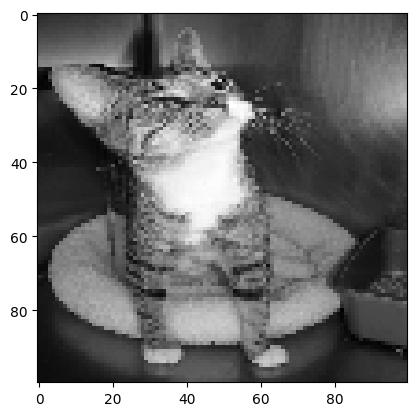

In [213]:
predictions = model.predict(X[:20])

for i in range(0, 20):
  print('|', f' id: {i}, real val: {y[i]}, predicted val: {predictions[i].item()}')
  print('V')
  plt.imshow(X[i], cmap='gray')
  plt.show()